In [167]:
%cd C:\Users\tenis\OneDrive\Desktop\Data_Projects\Impact_Capital
import pandas as pd
import numpy as np
from xml.etree import cElementTree as ElementTree
import xml.etree.ElementTree as et
from tqdm import tqdm
import logging
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import zipcodes
#exec(requests.get('https://raw.githubusercontent.com/ma-ji/npo_classifier/master/API/npoclass.py').text)

#logging.basicConfig(format='%(asctime)s: %(message)s', filename='analysis.log', level=logging.DEBUG)

C:\Users\tenis\OneDrive\Desktop\Data_Projects\Impact_Capital


# Data Cleaning

In [168]:
#Reading Data
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 300)
pd.set_option('display.min_rows', 50)
df2016 = pd.read_csv("C:/Users/tenis/OneDrive/Desktop/Data_Projects/Impact_Capital/data/interim/2016_objects.csv")
df2017 = pd.read_csv("C:/Users/tenis/OneDrive/Desktop/Data_Projects/Impact_Capital/data/interim/2017_objects.csv")
df2018 = pd.read_csv("C:/Users/tenis/OneDrive/Desktop/Data_Projects/Impact_Capital/data/interim/2018_objects.csv")
df2019 = pd.read_csv("C:/Users/tenis/OneDrive/Desktop/Data_Projects/Impact_Capital/data/interim/2019_objects.csv")
df2020 = pd.read_csv("C:/Users/tenis/OneDrive/Desktop/Data_Projects/Impact_Capital/data/interim/2020_objects.csv")




In [169]:
#concatenate
df = pd.concat([df2016,df2017,df2018,df2019,df2020],ignore_index=True)
df


,Unnamed: 0,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,State,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,MissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,schedule0
0,0,2013,2013-03-20,2013-12-31,2016-01-05T23:54:21-08:00,462346647,NaN,NaN,NaN,NaN,NaN,2013.0,CA,0,0,0,0,89438,0,0,89438,0,0,0,89438,90415,88857,1558,0,-977,9628,10605,-977,"Kol Ahava, which translates to all love in Heb...","Kol Ahava, which translates to all love in Heb...",X,NaN,NaN,NaN,false,false,NaN,X,NaN,NaN,false,{'{http://www.irs.gov/efile}SupplementalInform...
1,0,2013,2013-06-01,2014-05-31,2016-01-08T12:29:32-06:00,751508091,NaN,NaN,NaN,NaN,NaN,1979.0,TX,0,0,0,0,428679,0,79154,507833,12120,31507,-88289,463171,418337,303359,69389,45589,44834,712679,34066,678613,"Provide accurate and current information, reso...","Provide accurate and current information, reso...",X,NaN,NaN,NaN,false,false,NaN,NaN,NaN,NaN,false,{'{http://www.irs.gov/efile}SupplementalInform...
2,0,2013,2013-05-01,2014-04-30,2015-12-29T16:12:18-06:00,751840556,NaN,NaN,NaN,NaN,NaN,1982.0,TX,0,0,0,30943,0,0,2507,33450,62061,1,67,95579,89852,89852,0,0,5727,76579,2804,73775,TO SUPPORT THE HIGH SCHOOL DRILL TEAM FOR EDUC...,The purpose of the Highlandette Booster Club s...,NaN,NaN,X,NaN,false,false,NaN,NaN,NaN,NaN,false,{'{http://www.irs.gov/efile}SupplementalInform...
3,0,2013,2013-07-01,2014-06-30,2015-12-23T16:47:25-07:00,237320198,NaN,NaN,NaN,NaN,NaN,1970.0,MI,0,248720,0,0,0,0,0,248720,269076,42,0,517838,591691,391608,200083,0,-73853,1397025,2319248,-922223,HOUSING AND PERSONAL CARE/ASSISTED LIVING FOR ...,WE WILL BE THE PREMIER SENIOR LIVING PROVIDER ...,X,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,{'{http://www.irs.gov/efile}SupplementalInform...
4,0,2013,2013-07-01,2014-06-30,2015-12-24T09:33:43-07:00,381493964,NaN,NaN,NaN,NaN,NaN,1964.0,MI,0,0,0,0,0,0,0,0,12121549,101,40732,12162382,10820255,9276179,1544076,0,1342127,10354907,2340618,8014289,TO OWN AND OPERATE A SKILLED NURSING FACILITY ...,WE WILL BE THE PREMIER SENIOR LIVING PROVIDER ...,X,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,{'{http://www.irs.gov/efile}SupplementalInform...
5,0,2014,2014-01-01,2014-12-31,2016-01-03T19:45:54-07:00,363602246,Arthur Lockhart Resource Institute,4941 W Chicago Ave,Chicago,IL,60651.0,1987.0,IL,25000,5000,0,5000,35000,40000,20000,90000,0,0,0,90000,90000,57948,32052,0,0,0,0,0,The Arthur Lockhart Resource Institute mission...,The mission of the Arthur Lockhart Resource In...,X,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,{'{http://www.irs.gov/efile}SupplementalInform...
6,0,2013,2013-07-01,2014-06-30,2016-01-05T10:17:05-07:00,382872875,NaN,NaN,NaN,NaN,NaN,1989.0,MI,0,0,0,0,0,0,0,0,2714246,137469,-11310,2840405,3049189,2094675,954514,0,-208784,13848058,19602875,-5754817,PROVIDE HOUSING AND HEALTHCARE TO RESIDENTS IN...,WE WILL BE THE PREMIER SENIOR LIVING PROVIDER ...,X,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,{'{http://www.irs.gov/efile}SupplementalInform...
7,0,2013,2013-09-01,2014-08-31,2016-01-07T10:05:30-00:00,237383435,NaN,NaN,NaN,NaN,NaN,1935.0,NY,0,0,0,0,0,0,0,0,101618,167,0,101785,109838,108083,1755,0,-8053,759283,121514,637769,To promote sportsmanship and to operate for it...,To promote sportsmanship and to operate for it...,X,NaN,NaN,NaN,false,false,NaN,NaN,NaN,NaN,false,"{'documentId': '990

In [170]:
#Fixing Types of Orgs 
df.loc[df['TypeOfOrganizationCorpInd'] != "X", 'TypeOfOrganizationCorpInd'] = 0
df.loc[df['TypeOfOrganizationCorpInd'] == "X", 'TypeOfOrganizationCorpInd'] = 1
df.loc[df['TypeOfOrganizationTrustInd'] != "X", 'TypeOfOrganizationTrustInd'] = 0
df.loc[df['TypeOfOrganizationTrustInd'] == "X", 'TypeOfOrganizationTrustInd'] = 1
df.loc[df['TypeOfOrganizationTrustInd'] != "X", 'TypeOfOrganizationTrustInd'] = 0
df.loc[df['TypeOfOrganizationTrustInd'] == "X", 'TypeOfOrganizationTrustInd'] = 1
df.loc[df['TypeOfOrganizationAssocInd'] != "X", 'TypeOfOrganizationAssocInd'] = 0
df.loc[df['TypeOfOrganizationAssocInd'] == "X", 'TypeOfOrganizationAssocInd'] = 1
df.loc[df['TypeOfOrganizationOtherInd'] != "X", 'TypeOfOrganizationOtherInd'] = 0
df.loc[df['TypeOfOrganizationOtherInd'] == "X", 'TypeOfOrganizationOtherInd'] = 1

#SchoolOperatingInd	OperateHospitalInd	AddressChangeInd	InitialReturnInd	AmendedReturnInd	TerminateOperationsInd
df[['SchoolOperatingInd', 'OperateHospitalInd','AddressChangeInd',
    'InitialReturnInd', 'AmendedReturnInd','FinalReturnInd','TerminateOperationsInd','TotalFunctionExpenses_FundraisingAmt']] =df[['SchoolOperatingInd', 'OperateHospitalInd','AddressChangeInd','InitialReturnInd',
                 'AmendedReturnInd','FinalReturnInd','TerminateOperationsInd', 'TotalFunctionExpenses_FundraisingAmt']].fillna(0)

df.loc[df['SchoolOperatingInd'] == 'false', 'SchoolOperatingInd'] = 0
df.loc[df['OperateHospitalInd'] == 'false', 'OperateHospitalInd'] = 0
df.loc[df['AddressChangeInd'] == 'false', 'AddressChangeInd'] = 0
df.loc[df['InitialReturnInd'] == 'false', 'InitialReturnInd'] = 0
df.loc[df['AmendedReturnInd'] == 'false', 'AmendedReturnInd'] = 0
df.loc[df['FinalReturnInd'] == 'false', 'FinalReturnInd'] = 0
df.loc[df['TerminateOperationsInd'] == 'false', 'TerminateOperationsInd'] = 0

df.loc[df['SchoolOperatingInd'] == '0', 'SchoolOperatingInd'] = 0
df.loc[df['OperateHospitalInd'] == '0', 'OperateHospitalInd'] = 0
df.loc[df['AddressChangeInd'] == '0', 'AddressChangeInd'] = 0
df.loc[df['InitialReturnInd'] == '0', 'InitialReturnInd'] = 0
df.loc[df['AmendedReturnInd'] == '0', 'AmendedReturnInd'] = 0
df.loc[df['FinalReturnInd'] == '0', 'FinalReturnInd'] = 0
df.loc[df['TerminateOperationsInd'] == '0', 'TerminateOperationsInd'] = 0

df.loc[df['SchoolOperatingInd'] != 0, 'SchoolOperatingInd'] = 1
df.loc[df['OperateHospitalInd'] != 0, 'OperateHospitalInd'] = 1
df.loc[df['AddressChangeInd'] != 0, 'AddressChangeInd'] = 1
df.loc[df['InitialReturnInd'] != 0, 'InitialReturnInd'] = 1
df.loc[df['AmendedReturnInd'] != 0, 'AmendedReturnInd'] = 1
df.loc[df['FinalReturnInd'] != 0, 'FinalReturnInd'] = 1
df.loc[df['TerminateOperationsInd'] != 0, 'TerminateOperationsInd'] = 1




In [171]:
df

,Unnamed: 0,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,State,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,MissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,schedule0
0,0,2013,2013-03-20,2013-12-31,2016-01-05T23:54:21-08:00,462346647,NaN,NaN,NaN,NaN,NaN,2013.0,CA,0,0,0,0,89438,0,0,89438,0,0,0,89438,90415,88857,1558,0,-977,9628,10605,-977,"Kol Ahava, which translates to all love in Heb...","Kol Ahava, which translates to all love in Heb...",1,0,0,0,0,0,0,1,0,0,0,{'{http://www.irs.gov/efile}SupplementalInform...
1,0,2013,2013-06-01,2014-05-31,2016-01-08T12:29:32-06:00,751508091,NaN,NaN,NaN,NaN,NaN,1979.0,TX,0,0,0,0,428679,0,79154,507833,12120,31507,-88289,463171,418337,303359,69389,45589,44834,712679,34066,678613,"Provide accurate and current information, reso...","Provide accurate and current information, reso...",1,0,0,0,0,0,0,0,0,0,0,{'{http://www.irs.gov/efile}SupplementalInform...
2,0,2013,2013-05-01,2014-04-30,2015-12-29T16:12:18-06:00,751840556,NaN,NaN,NaN,NaN,NaN,1982.0,TX,0,0,0,30943,0,0,2507,33450,62061,1,67,95579,89852,89852,0,0,5727,76579,2804,73775,TO SUPPORT THE HIGH SCHOOL DRILL TEAM FOR EDUC...,The purpose of the Highlandette Booster Club s...,0,0,1,0,0,0,0,0,0,0,0,{'{http://www.irs.gov/efile}SupplementalInform...
3,0,2013,2013-07-01,2014-06-30,2015-12-23T16:47:25-07:00,237320198,NaN,NaN,NaN,NaN,NaN,1970.0,MI,0,248720,0,0,0,0,0,248720,269076,42,0,517838,591691,391608,200083,0,-73853,1397025,2319248,-922223,HOUSING AND PERSONAL CARE/ASSISTED LIVING FOR ...,WE WILL BE THE PREMIER SENIOR LIVING PROVIDER ...,1,0,0,0,0,0,0,0,0,0,0,{'{http://www.irs.gov/efile}SupplementalInform...
4,0,2013,2013-07-01,2014-06-30,2015-12-24T09:33:43-07:00,381493964,NaN,NaN,NaN,NaN,NaN,1964.0,MI,0,0,0,0,0,0,0,0,12121549,101,40732,12162382,10820255,9276179,1544076,0,1342127,10354907,2340618,8014289,TO OWN AND OPERATE A SKILLED NURSING FACILITY ...,WE WILL BE THE PREMIER SENIOR LIVING PROVIDER ...,1,0,0,0,0,0,0,0,0,0,0,{'{http://www.irs.gov/efile}SupplementalInform...
5,0,2014,2014-01-01,2014-12-31,2016-01-03T19:45:54-07:00,363602246,Arthur Lockhart Resource Institute,4941 W Chicago Ave,Chicago,IL,60651.0,1987.0,IL,25000,5000,0,5000,35000,40000,20000,90000,0,0,0,90000,90000,57948,32052,0,0,0,0,0,The Arthur Lockhart Resource Institute mission...,The mission of the Arthur Lockhart Resource In...,1,0,0,0,0,0,0,0,0,0,0,{'{http://www.irs.gov/efile}SupplementalInform...
6,0,2013,2013-07-01,2014-06-30,2016-01-05T10:17:05-07:00,382872875,NaN,NaN,NaN,NaN,NaN,1989.0,MI,0,0,0,0,0,0,0,0,2714246,137469,-11310,2840405,3049189,2094675,954514,0,-208784,13848058,19602875,-5754817,PROVIDE HOUSING AND HEALTHCARE TO RESIDENTS IN...,WE WILL BE THE PREMIER SENIOR LIVING PROVIDER ...,1,0,0,0,0,0,0,0,0,0,0,{'{http://www.irs.gov/efile}SupplementalInform...
7,0,2013,2013-09-01,2014-08-31,2016-01-07T10:05:30-00:00,237383435,NaN,NaN,NaN,NaN,NaN,1935.0,NY,0,0,0,0,0,0,0,0,101618,167,0,101785,109838,108083,1755,0,-8053,759283,121514,637769,To promote sportsmanship and to operate for it...,To promote sportsmanship and to operate for it...,1,0,0,0,0,0,0,0,0,0,0,"{'documentId': '990O', 'softwareId': '13000230..."
8,0,2014,2014-07-01,2015-06-30,2015-12-23T15:22:01-07:00,330164420,Mountain Health and Community Services Inc,31115 Highway 94

### Ratios to measure nonprofit financial flexibility

* **Ratio of equity to total revenue** The implicit assumption is that organizations with a larger networth relative to revenue have a greater ability to replace revenue than those with a smaller or negative net worth. 
* **Ratio Administrative Expenses to total Expenses** Nonprofits with high administrative costs (relative to others in their category) are assumed to have the greatest opportunity to cut back on administrative costs without reducing programs. 

* **Operating Margins** A nonprofit’s operating margin is defined as its revenues less its expenditures, divided by its revenues. This shows the percentage that its net income represents of its revenues. 

* **Solvency** Total net assets to total assets. Calculated by dividing total net assets (total assets minus total liabilities) by total assets. The higher the rating the less likely nonprofit is to default 

* **Profitability** calculating by net income divided by total assets. 

* **Revenue Concentration** Closer to one signifies a nonprofit's revenue stream is concentrated in one resource

* **Resource Dependence Variables**  Dependence are funding source divided by total revenue


### Creating financially vulerable variable (Depdendent Variable)

* Reduction in the ratio of program expenses to total reveune 
* Hager, Galaskiewicz,Bielefeld, and Pins’s 1996 study found that many charities that ceased operations did so primarily for program-related reasons (suchas a reduction of donations or a decreased demand for program services). 


### NTEE Codes
I. Arts, Culture, and Humanities - A </br>
II. Education - B </br>
III. Environment and Animals - C, D </br>
IV. Health - E, F, G, H </br>
V. Human Services - I, J, K, L, M, N, O, P </br>
VI. International, Foreign Affairs - Q </br>
VII. Public, Societal Benefit - R, S, T, U, V, W </br>
VIII. Religion Related - X </br>

[NTEE Code Breakdown](https://nccs.urban.org/project/national-taxonomy-exempt-entities-ntee-codes#overview) </br>
[IRS Codes](https://nccs.urban.org/publication/irs-activity-codes)

In [172]:
df = df.drop(['Unnamed: 0', 'MissionDesc', 'schedule0'], axis=1)


df['Ratio_Equity_Revenue'] = df['NetAssetsOrFundBalancesEOYAmt']/df['CYTotalRevenueAmt']

df['Ratio_AdminExp_Exp'] = df['TotalFunctionExpenses_ManagementAndGeneralAmt']/df['CYTotalExpensesAmt']

df['Operating_Margin'] = (df['CYTotalRevenueAmt'] - df['CYTotalExpensesAmt'])/df['CYTotalRevenueAmt']

df['Profitability'] = (df['CYTotalRevenueAmt'] - df['CYTotalExpensesAmt'])/df['TotalAssetsEOYAmt']

df['Solvency'] = df['NetAssetsOrFundBalancesEOYAmt'] / df['TotalAssetsEOYAmt']

df['Revenue_Concentration'] = (df['RelatedOrganizationsAmt']/df['CYTotalRevenueAmt'])**2 + (df['GovernmentGrantsAmt']/df['CYTotalRevenueAmt'])**2 \
                               + (df['FederatedCampaignsAmt']/df['CYTotalRevenueAmt'])**2 + (df['MembershipDuesAmt']/df['CYTotalRevenueAmt'])**2 \
                               + (df['FundraisingAmt']/df['CYTotalRevenueAmt'])**2 + (df['NoncashContributionsAmt']/df['CYTotalRevenueAmt'])**2 \
                               + (df['AllOtherContributionsAmt']/df['CYTotalRevenueAmt'])**2 + (df['TotalProgramServiceRevenueAmt']/df['CYTotalRevenueAmt'])**2 \
                               + (df['CYInvestmentIncomeAmt']/df['CYTotalRevenueAmt'])**2 + (df['CYOtherRevenueAmt']/df['CYTotalRevenueAmt'])**2

#Resource Dependence measures 
df['Dependence_Grants'] = df['GovernmentGrantsAmt']/df['CYTotalRevenueAmt']
df['Dependence_Campaigns'] = df['FederatedCampaignsAmt']/df['CYTotalRevenueAmt']
df['Dependence_Memberships'] = df['MembershipDuesAmt']/df['CYTotalRevenueAmt']
df['Dependence_Fundraising'] = df['FundraisingAmt']/df['CYTotalRevenueAmt']
df['Dependence_ProgramServ'] = df['TotalProgramServiceRevenueAmt']/df['CYTotalRevenueAmt']
df['Dependence_Invest'] = df['CYInvestmentIncomeAmt']/df['CYTotalRevenueAmt']

#Dependent Variable 
df['Ratio_ProgramExp_Rev'] = df['TotalFunctionExpenses_ProgramServicesAmt']/df['CYTotalRevenueAmt']
df['Ratio_ProgramExp_Totalexp'] = df['TotalFunctionExpenses_ProgramServicesAmt']/df['CYTotalExpensesAmt']



df['BusinessName'].fillna("none", inplace = True) 
df['ActivityOrMissionDesc'].fillna("none", inplace = True)
df['name_mission'] = df['BusinessName'] + ". " + df['ActivityOrMissionDesc']
df2015 = df[df['TaxYr'] == 2015]
df2015["FormationYr"].fillna(2014, inplace = True)

#Adding BERT data 
BERT = pd.read_csv("C:/Users/tenis/OneDrive/Desktop/Data_Projects/Impact_Capital/data/raw/BERT_classifications2015.csv")
df2015BERT = pd.concat([df2015.reset_index(drop=True), BERT], axis=1, ignore_index=False)
print("Number of nonprofits: ", len(df2015BERT))

df2015BERT = df2015BERT.drop(['Unnamed: 0'], axis=1)


C:\Users\tenis\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Number of nonprofits:  233520


In [173]:
#Removing time seconds from ReturnTs to convert easily to datetime format 
df2015BERT['ReturnTs'] = df2015BERT['ReturnTs'].astype(str)
df2015BERT['ReturnTs'] = df2015BERT['ReturnTs'].str[:-15]

In [174]:
#Only keeping the last 990 form filed by a nonprofit because some have several
df2015BERT['ReturnTs']= pd.to_datetime(df2015BERT['ReturnTs'])
df2015BERT.sort_values('ReturnTs').drop_duplicates(['EIN'],keep='last')

,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,State,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Profitability,Solvency,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities
79553,2015,2015-01-01,2015-12-31,2015-12-31,231299931,AMVETS POST 22,206 BROADWAY,HANOVER,PA,173312501.0,1945.0,PA,0,0,0,-1715,0,0,0,-1715,0,0,730111,728396,697014,0,0,0,31382,2289554,3281,2286273,FRATERNAL ORGANIZATION FOR SERVICE MEMBERS AND...,0,0,1,0,0,0,0,0,0,0,0,3.138778,0.000000,0.043084,0.013707,0.998567,1.004720,0.000000,0.000000,-0.002354,0.000000,0.000000,0.000000,0.000000,0.000000,AMVETS POST 22. FRATERNAL ORGANIZATION FOR SER...,V,high (>=.99),"{'I': 0.338970422744751, 'II': 0.7969449758529..."
46906,2015,2015-01-01,2015-12-31,2015-12-31,364761936,AMVETS POST 22,209 BROADWAY,HANOVER,PA,17331.0,1945.0,PA,0,203601,0,25898,0,0,7641,237140,0,0,57023,294163,287148,287148,0,0,7015,108285,0,108285,ORGANIZATION OF ARMED SERVICES FOR MEMBERS AND...,1,0,0,0,0,0,0,0,0,0,0,0.368112,0.000000,0.023847,0.064783,1.000000,0.525056,0.692137,0.000000,0.088040,0.000000,0.000000,0.000000,0.976153,1.000000,AMVETS POST 22. ORGANIZATION OF ARMED SERVICES...,VI,high (>=.99),"{'I': 0.7037185430526733, 'II': 0.765199542045..."
71362,2015,2015-01-01,2015-12-31,2016-01-01,680186144,TUSKEGEE AIRMEN INC,PO BOX 15029,SACRAMENTO,CA,95851.0,1976.0,CA,0,0,0,7450,38358,0,9664,55472,0,43,0,55515,65211,31444,0,33767,-9696,35593,0,35593,EDUCATION ASSISTANCE AWARDS PROGRAM,1,0,0,0,0,0,0,0,0,0,0,0.641142,0.000000,-0.174655,-0.272413,1.000000,0.525723,0.000000,0.000000,0.134198,0.690948,0.000000,0.000775,0.566405,0.482189,TUSKEGEE AIRMEN INC. EDUCATION ASSISTANCE AWAR...,I,high (>=.99),"{'I': 0.9998780488967896, 'II': 0.440937787294..."
71346,2015,2015-01-01,2015-12-31,2016-01-01,472617463,YONSEI GLOBAL CEO ASSOCIATION,3700 WILSHIRE BLVD,LOS ANGELES,CA,90010.0,2015.0,CA,0,0,0,22500,0,0,3000,25500,10930,0,0,36430,24056,6291,10546,0,12374,28702,0,28702,SEE SCHEDULE O,1,0,0,0,0,0,1,1,0,0,0,0.787867,0.438394,0.339665,0.431120,1.000000,0.478256,0.000000,0.000000,0.617623,0.000000,0.300027,0.000000,0.172687,0.261515,YONSEI GLOBAL CEO ASSOCIATION. SEE SCHEDULE O,VI,high (>=.99),"{'I': 0.9180177450180054, 'II': 0.647638261318..."
71153,2015,2015-01-01,2015-12-31,2016-01-01,480984804,KIOWA COUNTY COUNCIL ON AGING INC,431 SOUTH MAIN STREET,GREENSBURG,KS,67054.0,1984.0,KS,0,63284,0,0,0,0,2263,65547,5031,7738,6588,84904,113457,39062,35343,0,-28553,940045,1185,938860,TO SERVE THE NEEDS OF SENIOR CITIZENS OF KIOWA...,1,0,0,0,0,0,0,0,0,0,0,11.057901,0.311510,-0.336297,-0.030374,0.998739,0.574109,0.745359,0.000000,0.000000,0.000000,0.059255,0.091138,0.460073,0.344289,KIOWA COUNTY COUNCIL ON AGING INC. TO SERVE TH...,II,high (>=.99),"{'I': 0.3650021255016327, 'II': 0.999740719795..."
70604,2015,2015-01-01,2015-12-31,2016-01-01,680426714,Northern California Vipassana Center,PO Box 265,Cobb,CA,95426.0,1998.0,CA,0,0,0,0,0,0,387020,387020,0,-2799,0,384221,379188,273228,105960,0,5033,211967

# Contextual County Information 

In [175]:
#Removing decimals and changing it to a string
df2015BERT['ZIPCd']  = df2015BERT['ZIPCd'].fillna(0)
df2015BERT['ZIPCd'] = df2015BERT['ZIPCd'].astype('int64')
df2015BERT['FormationYr']  = df2015BERT['FormationYr'].fillna(0)
df2015BERT['FormationYr'] = df2015BERT['FormationYr'].astype('int64')
df2015BERT['ZIPCd'] = df2015BERT['ZIPCd'].astype(str)

In [9]:
#Add back zeros that were removed
for i in df2015BERT.index:
    if len(df2015BERT.at[i,'ZIPCd']) == 4:
        df2015BERT.at[i,'ZIPCd'] = "0" + df2015BERT.at[i,'ZIPCd']
    elif len(df2015BERT.at[i,'ZIPCd']) == 8:
        df2015BERT.at[i,'ZIPCd'] = "0" + df2015BERT.at[i,'ZIPCd']
    elif len(df2015BERT.at[i,'ZIPCd']) == 3:
        df2015BERT.at[i,'ZIPCd'] = "00" + df2015BERT.at[i,'ZIPCd']
    elif len(df2015BERT.at[i,'ZIPCd']) == 7:
        df2015BERT.at[i,'ZIPCd'] = "00" + df2015BERT.at[i,'ZIPCd']
        
#Remove the extra four numbers from zipcode plus 4         
for i in df2015BERT.index:
    if len(df2015BERT.at[i,'ZIPCd']) == 9:
        zipcodeplus4 = df2015BERT['ZIPCd'][i]
        zipcode = zipcodeplus4[:-4]
        df2015BERT.at[i,'ZIPCd'] = zipcode

In [10]:
#testing zipcodes package
test = zipcodes.matching('99556')
print(test[0]['county'])
example = zipcodes.matching(df2015BERT['ZIPCd'][1020])
example[0]['county']

Kenai Peninsula Borough


'Yankton County'

In [13]:
from tqdm import tqdm

#Add column for county using zipcode   
df2015BERT['County'] = ""
for i in tqdm(df2015BERT.index):
    try:
        zipcode = df2015BERT['ZIPCd'][i]
        zipcodelist = zipcodes.matching(zipcode)
        county = zipcodelist[0]['county']
        df2015BERT.at[i,'County'] = county

    except IndexError:
        df2015BERT.at[i,'County'] = "Failed"


100%|██████████| 233520/233520 [43:43<00:00, 89.03it/s]    


In [14]:
#Pulling out the nonprofits whos zipcodes no longer exist or were inputted incorrect 
df2015BERT2 = df2015BERT[df2015BERT['County'] == "Failed"]
df2015BERT2

,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,State,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities,County
1030,2015,2015-01-01,2015-12-31,2016-03-15,251720801,WORLD ASSN OF SOCIETIES OF PATHOLOGY AND,NaN,NaN,NaN,0,2005,IL,0,0,0,7056,0,0,47950,55006,0,109,0,55115,46269,0,0,0,8846,791963,0,791963,TO IMPROVE HEALTH THROUGHOUT THE WORLD BY PROM...,1,0,0,0,0,0,0,0,0,0,0,14.369282,0.000000,0.160501,0.773292,0.000000,0.000000,0.128023,0.000000,0.000000,0.001978,0.000000,0.000000,WORLD ASSN OF SOCIETIES OF PATHOLOGY AND. TO I...,V,high (>=.99),"{'I': 0.4072325527667999, 'II': 0.679114460945...",Failed
2068,2015,2015-01-01,2015-12-31,2016-04-18,752736730,KAREN DUDLEY MINISTRIES,PO BOX 151461,DALLAS,TX,75213,2006,TX,0,0,0,0,0,0,208507,208507,0,0,0,208507,249673,86238,156071,7364,-41166,0,0,0,STREET CHURCH AND YOUTH COUNSELING,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.625102,-0.197432,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413598,0.345404,KAREN DUDLEY MINISTRIES. STREET CHURCH AND YOU...,IV,high (>=.99),"{'I': 0.42428362369537354, 'II': 0.73667901754...",Failed
4033,2015,2015-01-01,2015-12-31,2016-05-11,990369955,INTERIOR DESIGN CONTINUING EDUCATION COUNCIL,NaN,NaN,NaN,0,2010,DE,0,0,0,0,0,0,0,0,424718,5815,0,430533,319699,0,0,0,110834,492601,48608,443993,THE INTERIOR DESIGN CONTINUING EDUCATION COUNC...,1,0,0,0,0,0,1,0,0,0,0,1.031264,0.000000,0.257434,0.973352,0.000000,0.000000,0.000000,0.000000,0.986493,0.013507,0.000000,0.000000,INTERIOR DESIGN CONTINUING EDUCATION COUNCIL. ...,IV,high (>=.99),"{'I': 0.39584919810295105, 'II': 0.77360874414...",Failed
5407,2015,2015-01-01,2015-12-31,2016-05-13,251620513,Center Presbyterian Senior Housing Inc,1215 Hulton Road,Oakmont,PA,15039,1989,PA,0,0,0,0,0,0,0,0,432262,81,0,432343,436723,398532,38191,0,-4380,859425,1997483,-1138058,Subsidized housing & supportive services for e...,1,0,0,0,0,0,0,0,0,0,0,-2.632304,0.087449,-0.010131,0.999625,0.000000,0.000000,0.000000,0.000000,0.999813,0.000187,0.921796,0.912551,Center Presbyterian Senior Housing Inc. Subsid...,IX,high (>=.99),"{'I': 0.6825864911079407, 'II': 0.299396693706...",Failed
5573,2015,2015-01-01,2015-12-31,2016-05-13,981156450,Signal Hill Life Education Society,NaN,NaN,NaN,0,1974,NaN,0,0,0,2489,0,0,383259,385748,146074,245,536,532603,451755,331404,81615,38736,80848,159500,8656,150844,See Schedule O.,1,0,0,0,0,0,0,0,0,0,0,0.283220,0.180662,0.151798,0.593062,0.000000,0.000000,0.004673,0.000000,0.274264,0.000460,0.622235,0.733592,Signal Hill Life Education Society. See Schedu...,V,high (>=.99),"{'I': 0.9422171115875244, 'II': 0.800904512405...",Failed
6143,2015,2015-01-01,2015-12-31,2016-05-16,66037010,AMERICAN ACADEMY OF INSURANCE MEDICINE,NaN,NaN,NaN,0,1902,NY,0,0,0,111435,0,0,0,111435,321597,11259,0,444291,443782,332727,111055,0,509,778963,3150,775813,TO PROVIDE FOR THE ADVANCEMENT OF THE SCIENCE ...,0,0,1,0,0,0,0,0,0,0,0,1.746182,0.250247,0.001146,0.587499,

In [15]:
df2015BERT = df2015BERT[df2015BERT['County'] != 'Failed']

df2015BERT.to_csv("data/interim/data2015_bert_zipcodes.csv")

# Pulling in Census Data 

In [176]:
# Race
race = pd.read_csv('data/external/race_2015_acs5_DP05.csv')
race = race[['County','State','Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone',
             'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone',
            'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
             'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone',
             'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)'  
            ]]
race = race.rename(columns={"Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone" : "White",
                           "Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone" : "Black",
                           "Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone" : "Native American",
                           "Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone" : "Asian",
                           "Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)" : "Latino"})
race.head()

,County,State,White,Black,Native American,Asian,Latino
0,Franklin County,Arkansas,92.8,0.7,1.6,0.3,2.7
1,Fulton County,Arkansas,95.9,0.1,0.4,1.5,1.2
2,Garland County,Arkansas,83.0,8.3,0.5,0.6,5.2
3,Grant County,Arkansas,93.1,3.8,0.3,0.5,1.2
4,Greene County,Arkansas,94.5,0.9,0.2,0.1,2.6


In [177]:
eco = pd.read_csv('data/external/economic_2015_acs5_DP03.csv')
eco = eco[['County','State','Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)',
          'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force',
           'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed'
          ]]

eco = eco.rename(columns={'Estimate!!INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)' :
                         "Median Household Income",
                         "Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force" : "In labor force",
                         "Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed":
                         "Unemployed"})

eco['Unemployment Rate'] = eco['Unemployed']/eco['In labor force']
eco.head()

C:\Users\tenis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (60,61,68,69,246,247,274,275,358,359,366,367,370,371,374,375,440,441,444,445,448,449,453,454,480,481,484,485,492,493,496,497,500,501,504,505,516,517,520,521,524,525,528,529) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,County,State,Median Household Income,In labor force,Unemployed,Unemployment Rate
0,Franklin County,Arkansas,39285,7416,814,0.109763
1,Fulton County,Arkansas,37066,4885,368,0.075333
2,Garland County,Arkansas,38733,43776,4021,0.091854
3,Grant County,Arkansas,46171,8396,788,0.093854
4,Greene County,Arkansas,41286,19447,1748,0.089885


In [178]:
pop = pd.read_csv('data/external/pop_2015_acs5_b01003.csv')
pop = pop[['County', 'State', 'Estimate!!Total']]
pop = pop.rename(columns={'Estimate!!Total': 'Population'})
pop.head()

,County,State,Population
0,Autauga County,Alabama,55221
1,Baldwin County,Alabama,195121
2,Barbour County,Alabama,26932
3,Bibb County,Alabama,22604
4,Blount County,Alabama,57710


In [179]:
# Join Demographic data
acs = pd.merge(pop, eco,  how='left', on=['County','State'])
acs = pd.merge(acs, race,  how='left', on=['County','State'])
acs['join_column'] = acs['County'] + "," + acs['State']
acs.head()
#acs.to_csv("data/interim/acs_2015.csv")

,County,State,Population,Median Household Income,In labor force,Unemployed,Unemployment Rate,White,Black,Native American,Asian,Latino,join_column
0,Autauga County,Alabama,55221,51281,26415,1984,0.075109,75.8,18.5,0.4,1.0,2.6,"Autauga County, Alabama"
1,Baldwin County,Alabama,195121,50254,93167,6972,0.074833,83.1,9.5,0.6,0.7,4.5,"Baldwin County, Alabama"
2,Barbour County,Alabama,26932,32964,10439,1842,0.176454,46.2,46.7,0.2,0.4,4.6,"Barbour County, Alabama"
3,Bibb County,Alabama,22604,38678,9049,752,0.083103,74.5,21.4,0.4,0.1,2.2,"Bibb County, Alabama"
4,Blount County,Alabama,57710,45813,24065,1843,0.076584,87.9,1.5,0.3,0.1,8.6,"Blount County, Alabama"


In [180]:
abbre = pd.read_csv('data/external/csvData.csv')
abbre.head()

,STATE,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [148]:
stopgap = pd.read_csv('data/interim/data2015_bert_zipcodes.csv')


In [181]:
stopgap

,Unnamed: 0,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,State,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities,County
0,0,2015,2015-01-01,2015-12-31,2016-01-12,900643363,PEAKS FOUNDATION INC,4497 BELVEDERE PLACE,MARIETTA,GA,30067,2010,GA,0,0,0,0,0,0,11,11,17000,41,1000,18052,43121,31529,11592,0,-25069,0,-28,28,WE INSPIRE AND ENABLE WOMEN TO REACH THEIR HIG...,1,0,0,0,0,0,0,0,0,1,1,0.001551,0.268825,-1.388710,0.889918,0.000000,0.0,0.000000,0.000000,0.941724,0.002271,1.746565,0.731175,PEAKS FOUNDATION INC. WE INSPIRE AND ENABLE WO...,VII,high (>=.99),"{'I': 0.591245174407959, 'II': 0.5607265233993...",Cobb County
1,1,2015,2015-01-01,2015-12-31,2016-01-13,204349451,KOREAN AMERICAN LEADERSHIP FOUNDATI,981 S WESTERN AVE,LOS ANGELES,CA,90006,2006,CA,0,0,0,7200,0,0,18178,25378,0,0,26466,51844,70281,19400,48504,2377,-18437,532596,250000,282596,THE ORGANIZATION WAS ESTABLISHED IN 2006 FOR T...,1,0,0,0,0,0,0,0,0,0,0,5.450891,0.690144,-0.355625,0.402831,0.000000,0.0,0.138878,0.000000,0.000000,0.000000,0.374200,0.276035,KOREAN AMERICAN LEADERSHIP FOUNDATI. THE ORGAN...,II,high (>=.99),"{'I': 0.5794297456741333, 'II': 0.998338639736...",Los Angeles County
2,2,2015,2015-01-01,2015-12-31,2016-01-15,454120606,IMPACT 100 OF NORTHWEST FLORIDA INC,PO BOX 4266,FORT WALTON BEACH,FL,32549,2011,FL,0,0,0,323000,0,0,8388,331388,0,155,0,331543,328752,323000,5752,0,2791,498292,487999,10293,TO PROVIDE GRANTS TO LOCAL NON-PROFIT ORGANIZA...,1,0,0,0,0,0,0,0,0,0,0,0.031046,0.017496,0.008418,0.949769,0.000000,0.0,0.974233,0.000000,0.000000,0.000468,0.974233,0.982504,IMPACT 100 OF NORTHWEST FLORIDA INC. TO PROVID...,VII,high (>=.99),"{'I': 0.35722142457962036, 'II': 0.75599706172...",Okaloosa County
3,3,2015,2015-01-01,2015-12-31,2016-01-15,201537585,UNIVERSITY OF MASSACHUSETTS-SEIU,26 WEST STREET NO 3RD FL,BOSTON,MA,2111,1985,MA,0,0,0,0,0,0,0,0,372256,0,0,372256,354861,0,0,0,17395,337492,0,337492,PAYMENT OF DENTAL AND VISION BENEFITS TO PARTI...,0,0,0,0,0,0,0,0,0,0,0,0.906613,0.000000,0.046729,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,UNIVERSITY OF MASSACHUSETTS-SEIU. PAYMENT OF D...,I,high (>=.99),"{'I': 0.9996774196624756, 'II': 0.928327500820...",Suffolk County
4,4,2015,2015-01-01,2015-12-31,2016-01-15,351848645,MID-WEST AID PLAN,9034 N 425 W,MILFORD,IN,46542,1992,IN,0,380437,0,0,0,0,0,380437,0,8327,0,388764,511052,511052,0,0,-122288,486589,0,486589,TO SHARE AND BEAR ONE ANOTHERS BURDENS (GALATI...,0,0,1,0,0,0,0,0,0,0,0,1.251631,0.000000,-0.314556,0.958079,0.978581,0.0,0.000000,0.000000,0.000000,0.021419,1.314556,1.000000,MID-WEST AID PLAN. TO SHARE AND BEAR ONE ANOTH...,I,high (>=.99),"{'I': 0.9998550415039062, 'II': 0.392487227916...",Kosciusko County
5,5,2015,2015-01-01,2015-12-31,2016-01-16,450346856,Fessenden Country Club,PO Box 313,Fessenden,ND,58438,1974,ND,0,342415,0,23860,32365,0,0,398640,11986,77,42044,452747,122340,122340,0,0,330407,430208,10775

In [182]:
zipcodes = stopgap[['EIN', 'County']]

In [183]:
datawhy = pd.merge(df2015BERT, zipcodes, how='left', on = 'EIN')

In [184]:
data2015 = datawhy
data2015 = pd.merge(data2015, abbre, how = 'left',
                      left_on= ['State'], right_on = ['Code'])

data2015 = data2015.drop(['State', 'Code'], axis =1)
data2015 = data2015.rename(columns={'STATE':'State'})

data2015['join_column'] = data2015['County'] + ", " + data2015['State']

#data2015.dropna(subset = ["State"], inplace=True)
#data2015.dropna(subset = ["County"], inplace=True)

data2015 = pd.merge(data2015, acs, on = 'join_column', how = 'left', suffixes=('', '_y'))
data2015.drop(data2015.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

data2015.info()
data2015

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237612 entries, 0 to 237611
Data columns (total 74 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   TaxYr                                          237612 non-null  int64         
 1   TaxPeriodBeginDt                               237612 non-null  object        
 2   TaxPeriodEndDt                                 237612 non-null  object        
 3   ReturnTs                                       237612 non-null  datetime64[ns]
 4   EIN                                            237612 non-null  int64         
 5   BusinessName                                   237612 non-null  object        
 6   AddressLine1Txt                                237416 non-null  object        
 7   City                                           237417 non-null  object        
 8   ZIPCd                                       

,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Profitability,Solvency,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities,County,State,join_column,Population,Median Household Income,In labor force,Unemployed,Unemployment Rate,White,Black,Native American,Asian,Latino
0,2015,2015-01-01,2015-12-31,2016-01-12,900643363,PEAKS FOUNDATION INC,4497 BELVEDERE PLACE,MARIETTA,30067,2010,GA,0,0,0,0,0,0,11,11,17000,41,1000,18052,43121,31529,11592,0,-25069,0,-28,28,WE INSPIRE AND ENABLE WOMEN TO REACH THEIR HIG...,1,0,0,0,0,0,0,0,0,1,1,0.001551,0.268825,-1.388710,-inf,inf,0.889918,0.000000,0.0,0.000000,0.000000,0.941724,0.002271,1.746565,0.731175,PEAKS FOUNDATION INC. WE INSPIRE AND ENABLE WO...,VII,high (>=.99),"{'I': 0.591245174407959, 'II': 0.5607265233993...",Cobb County,Georgia,"Cobb County, Georgia",719133.0,65873,399396.0,31944.0,0.079981,54.4,25.7,0.2,4.9,12.6
1,2015,2015-01-01,2015-12-31,2016-01-13,204349451,KOREAN AMERICAN LEADERSHIP FOUNDATI,981 S WESTERN AVE,LOS ANGELES,90006,2006,CA,0,0,0,7200,0,0,18178,25378,0,0,26466,51844,70281,19400,48504,2377,-18437,532596,250000,282596,THE ORGANIZATION WAS ESTABLISHED IN 2006 FOR T...,1,0,0,0,0,0,0,0,0,0,0,5.450891,0.690144,-0.355625,-0.034617,0.530601,0.402831,0.000000,0.0,0.138878,0.000000,0.000000,0.000000,0.374200,0.276035,KOREAN AMERICAN LEADERSHIP FOUNDATI. THE ORGAN...,II,high (>=.99),"{'I': 0.5794297456741333, 'II': 0.998338639736...",Los Angeles County,California,"Los Angeles County, California",10038388.0,56196,5153776.0,515124.0,0.099951,26.9,8.0,0.2,14.0,48.2
2,2015,2015-01-01,2015-12-31,2016-01-15,454120606,IMPACT 100 OF NORTHWEST FLORIDA INC,PO BOX 4266,FORT WALTON BEACH,325494266,2011,FL,0,0,0,323000,0,0,8388,331388,0,155,0,331543,328752,323000,5752,0,2791,498292,487999,10293,TO PROVIDE GRANTS TO LOCAL NON-PROFIT ORGANIZA...,1,0,0,0,0,0,0,0,0,0,0,0.031046,0.017496,0.008418,0.005601,0.020657,0.949769,0.000000,0.0,0.974233,0.000000,0.000000,0.000468,0.974233,0.982504,IMPACT 100 OF NORTHWEST FLORIDA INC. TO PROVID...,VII,high (>=.99),"{'I': 0.35722142457962036, 'II': 0.75599706172...",Okaloosa County,Florida,"Okaloosa County, Florida",192237.0,55880,99433.0,6253.0,0.062887,75.2,8.8,0.6,2.8,8.1
3,2015,2015-01-01,2015-12-31,2016-01-15,201537585,UNIVERSITY OF MASSACHUSETTS-SEIU,26 WEST STREET NO 3RD FL,BOSTON,21111207,1985,MA,0,0,0,0,0,0,0,0,372256,0,0,372256,354861,0,0,0,17395,337492,0,337492,PAYMENT OF DENTAL AND VISION BENEFITS TO PARTI...,0,0,0,0,0,0,0,0,0,0,0,0.906613,0.000000,0.046729,0.051542,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,UNIVERSITY OF MASSACHUSETTS-SEIU. PAYMENT OF D...,I,high (>=.99),"{'I': 0.9996774196624756, 'II': 0.928327500820...",Suffolk County,Massachusetts,"Suffolk County, Massachusetts",758919.0,55044,439996.0,38186.0,0.086787,46.5,20.0,0.2,8.6,21.3
4,2015,2015-01-01,2015-12-31,2016-01-15,351848645,MID-WEST AID PLAN,9034 N 425 W,MILFORD,46542,1992,

In [186]:
#Nonprofit Density
nonprofit_density = data2015.groupby(['join_column']).count().reset_index()
nonprofit_density

,join_column,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Profitability,Solvency,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities,County,State,Population,Median Household Income,In labor force,Unemployed,Unemployment Rate,White,Black,Native American,Asian,Latino
0,"Abbeville County, South Carolina",10,10,10,10,10,10,10,10,10,10,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,"Acadia Parish, Louisiana",19,19,19,19,19,19,19,19,19,19,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
2,"Accomack County, Virginia",44,44,44,44,44,44,44,44,44,44,41,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,43,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
3,"Ada County, Idaho",359,359,359,359,359,359,359,359,359,359,348,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,358,359,357,355,357,357,357,357,357,357,357,358,358,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359
4,"Adair County, Iowa",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,"Adair County, Kentucky",4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,"Adair County, Missouri",24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
7,"Adair County, Oklahoma",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
8,"Adams County, Colorado",166,166,166,166,166,166,166,166,166,166,160,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,165,166,165,163,166,166,166,166,166,166,166,166,165,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
9,"Adams County, Idaho",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [187]:
nonprofit_density = nonprofit_density[['join_column', 'TaxYr']]
nonprofit_density = nonprofit_density.rename(columns={'TaxYr':'Nonprofit Density'})
nonprofit_density

data2015 = pd.merge(data2015, nonprofit_density, on = 'join_column', how = 'left', suffixes=('', '_y'))
data2015.drop(data2015.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
data2015

,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Profitability,Solvency,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities,County,State,join_column,Population,Median Household Income,In labor force,Unemployed,Unemployment Rate,White,Black,Native American,Asian,Latino,Nonprofit Density
0,2015,2015-01-01,2015-12-31,2016-01-12,900643363,PEAKS FOUNDATION INC,4497 BELVEDERE PLACE,MARIETTA,30067,2010,GA,0,0,0,0,0,0,11,11,17000,41,1000,18052,43121,31529,11592,0,-25069,0,-28,28,WE INSPIRE AND ENABLE WOMEN TO REACH THEIR HIG...,1,0,0,0,0,0,0,0,0,1,1,0.001551,0.268825,-1.388710,-inf,inf,0.889918,0.000000,0.0,0.000000,0.000000,0.941724,0.002271,1.746565,0.731175,PEAKS FOUNDATION INC. WE INSPIRE AND ENABLE WO...,VII,high (>=.99),"{'I': 0.591245174407959, 'II': 0.5607265233993...",Cobb County,Georgia,"Cobb County, Georgia",719133.0,65873,399396.0,31944.0,0.079981,54.4,25.7,0.2,4.9,12.6,395.0
1,2015,2015-01-01,2015-12-31,2016-01-13,204349451,KOREAN AMERICAN LEADERSHIP FOUNDATI,981 S WESTERN AVE,LOS ANGELES,90006,2006,CA,0,0,0,7200,0,0,18178,25378,0,0,26466,51844,70281,19400,48504,2377,-18437,532596,250000,282596,THE ORGANIZATION WAS ESTABLISHED IN 2006 FOR T...,1,0,0,0,0,0,0,0,0,0,0,5.450891,0.690144,-0.355625,-0.034617,0.530601,0.402831,0.000000,0.0,0.138878,0.000000,0.000000,0.000000,0.374200,0.276035,KOREAN AMERICAN LEADERSHIP FOUNDATI. THE ORGAN...,II,high (>=.99),"{'I': 0.5794297456741333, 'II': 0.998338639736...",Los Angeles County,California,"Los Angeles County, California",10038388.0,56196,5153776.0,515124.0,0.099951,26.9,8.0,0.2,14.0,48.2,6462.0
2,2015,2015-01-01,2015-12-31,2016-01-15,454120606,IMPACT 100 OF NORTHWEST FLORIDA INC,PO BOX 4266,FORT WALTON BEACH,325494266,2011,FL,0,0,0,323000,0,0,8388,331388,0,155,0,331543,328752,323000,5752,0,2791,498292,487999,10293,TO PROVIDE GRANTS TO LOCAL NON-PROFIT ORGANIZA...,1,0,0,0,0,0,0,0,0,0,0,0.031046,0.017496,0.008418,0.005601,0.020657,0.949769,0.000000,0.0,0.974233,0.000000,0.000000,0.000468,0.974233,0.982504,IMPACT 100 OF NORTHWEST FLORIDA INC. TO PROVID...,VII,high (>=.99),"{'I': 0.35722142457962036, 'II': 0.75599706172...",Okaloosa County,Florida,"Okaloosa County, Florida",192237.0,55880,99433.0,6253.0,0.062887,75.2,8.8,0.6,2.8,8.1,104.0
3,2015,2015-01-01,2015-12-31,2016-01-15,201537585,UNIVERSITY OF MASSACHUSETTS-SEIU,26 WEST STREET NO 3RD FL,BOSTON,21111207,1985,MA,0,0,0,0,0,0,0,0,372256,0,0,372256,354861,0,0,0,17395,337492,0,337492,PAYMENT OF DENTAL AND VISION BENEFITS TO PARTI...,0,0,0,0,0,0,0,0,0,0,0,0.906613,0.000000,0.046729,0.051542,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,UNIVERSITY OF MASSACHUSETTS-SEIU. PAYMENT OF D...,I,high (>=.99),"{'I': 0.9996774196624756, 'II': 0.928327500820...",Suffolk County,Massachusetts,"Suffolk County, Massachusetts",758919.0,55044,439996.0,38186.0,0.086787,46.5,20.0,0.2,8.6,21.3,1690.0
4,2015,2015-01-01,2015-12-31,2016-01-15,351848645,MID-WE

In [188]:
#Remove nonprofits that terminated in 2015
data2015 = data2015[data2015['FinalReturnInd'] != 1]


In [189]:
df2016 = df[df['TaxYr'] == 2016]
df2016["FormationYr"].fillna(2015, inplace = True)
df2017 = df[df['TaxYr'] == 2017]
df2018 = df[df['TaxYr'] == 2018]

#Pulling terminate variable from 2016-2018
df2016terminate = df2016.loc[:,['EIN', 'FinalReturnInd']]
df2016terminate = df2016terminate.rename(columns = {'FinalReturnInd' : 'FinalReturnInd2016'})
df2017terminate = df2017.loc[:,['EIN', 'FinalReturnInd']]
df2017terminate = df2017terminate.rename(columns = {'FinalReturnInd' : 'FinalReturnInd2017'})
df2018terminate = df2018.loc[:,['EIN', 'FinalReturnInd']]
df2018terminate = df2018terminate.rename(columns = {'FinalReturnInd' : 'FinalReturnInd2018'})

len(df2018terminate[df2018terminate['FinalReturnInd2018'] ==1])


C:\Users\tenis\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


1470

In [190]:
data2015 = data2015.merge(df2016terminate, on='EIN', how = 'left')
data2015

,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Profitability,Solvency,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities,County,State,join_column,Population,Median Household Income,In labor force,Unemployed,Unemployment Rate,White,Black,Native American,Asian,Latino,Nonprofit Density,FinalReturnInd2016
0,2015,2015-01-01,2015-12-31,2016-01-13,204349451,KOREAN AMERICAN LEADERSHIP FOUNDATI,981 S WESTERN AVE,LOS ANGELES,90006,2006,CA,0,0,0,7200,0,0,18178,25378,0,0,26466,51844,70281,19400,48504,2377,-18437,532596,250000,282596,THE ORGANIZATION WAS ESTABLISHED IN 2006 FOR T...,1,0,0,0,0,0,0,0,0,0,0,5.450891,0.690144,-0.355625,-0.034617,0.530601,0.402831,0.000000,0.0,0.138878,0.000000,0.000000,0.000000,0.374200,0.276035,KOREAN AMERICAN LEADERSHIP FOUNDATI. THE ORGAN...,II,high (>=.99),"{'I': 0.5794297456741333, 'II': 0.998338639736...",Los Angeles County,California,"Los Angeles County, California",10038388.0,56196,5153776.0,515124.0,0.099951,26.9,8.0,0.2,14.0,48.2,6462.0,0
1,2015,2015-01-01,2015-12-31,2016-01-15,454120606,IMPACT 100 OF NORTHWEST FLORIDA INC,PO BOX 4266,FORT WALTON BEACH,325494266,2011,FL,0,0,0,323000,0,0,8388,331388,0,155,0,331543,328752,323000,5752,0,2791,498292,487999,10293,TO PROVIDE GRANTS TO LOCAL NON-PROFIT ORGANIZA...,1,0,0,0,0,0,0,0,0,0,0,0.031046,0.017496,0.008418,0.005601,0.020657,0.949769,0.000000,0.0,0.974233,0.000000,0.000000,0.000468,0.974233,0.982504,IMPACT 100 OF NORTHWEST FLORIDA INC. TO PROVID...,VII,high (>=.99),"{'I': 0.35722142457962036, 'II': 0.75599706172...",Okaloosa County,Florida,"Okaloosa County, Florida",192237.0,55880,99433.0,6253.0,0.062887,75.2,8.8,0.6,2.8,8.1,104.0,0
2,2015,2015-01-01,2015-12-31,2016-01-15,201537585,UNIVERSITY OF MASSACHUSETTS-SEIU,26 WEST STREET NO 3RD FL,BOSTON,21111207,1985,MA,0,0,0,0,0,0,0,0,372256,0,0,372256,354861,0,0,0,17395,337492,0,337492,PAYMENT OF DENTAL AND VISION BENEFITS TO PARTI...,0,0,0,0,0,0,0,0,0,0,0,0.906613,0.000000,0.046729,0.051542,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,UNIVERSITY OF MASSACHUSETTS-SEIU. PAYMENT OF D...,I,high (>=.99),"{'I': 0.9996774196624756, 'II': 0.928327500820...",Suffolk County,Massachusetts,"Suffolk County, Massachusetts",758919.0,55044,439996.0,38186.0,0.086787,46.5,20.0,0.2,8.6,21.3,1690.0,0
3,2015,2015-01-01,2015-12-31,2016-01-15,351848645,MID-WEST AID PLAN,9034 N 425 W,MILFORD,46542,1992,IN,0,380437,0,0,0,0,0,380437,0,8327,0,388764,511052,511052,0,0,-122288,486589,0,486589,TO SHARE AND BEAR ONE ANOTHERS BURDENS (GALATI...,0,0,1,0,0,0,0,0,0,0,0,1.251631,0.000000,-0.314556,-0.251317,1.000000,0.958079,0.978581,0.0,0.000000,0.000000,0.000000,0.021419,1.314556,1.000000,MID-WEST AID PLAN. TO SHARE AND BEAR ONE ANOTH...,I,high (>=.99),"{'I': 0.9998550415039062, 'II': 0.392487227916...",Kosciusko County,Indiana,"Kosciusko County, Indiana",77983.0,52821,40107.0,2601.0,0.064852,89.0,0.7,0.3,1.0,7.8,59.0,0
4,2015,2015-01-01,2

In [191]:
data2015.FinalReturnInd2016.sum()

1215

In [192]:
data2015["FinalReturnInd2016"].fillna(2, inplace = True)
data2015.FinalReturnInd2016.sum()

34813

In [193]:
data2015 = data2015.merge(df2017terminate, on='EIN',how = 'left')
data2015["FinalReturnInd2017"].fillna(2, inplace = True)
data2015.FinalReturnInd2017.sum()

48982

In [194]:
data2015 = data2015.merge(df2018terminate, on='EIN',how = 'left')
data2015["FinalReturnInd2018"].fillna(2, inplace = True)
data2015.FinalReturnInd2018.sum()

118155

In [195]:
data2015['summed_terminate_columns'] = data2015[['FinalReturnInd2016','FinalReturnInd2017','FinalReturnInd2018']].astype(float).sum(1)
data2015.summed_terminate_columns.sum()

202230.0

In [196]:
data2015

,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Profitability,Solvency,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities,County,State,join_column,Population,Median Household Income,In labor force,Unemployed,Unemployment Rate,White,Black,Native American,Asian,Latino,Nonprofit Density,FinalReturnInd2016,FinalReturnInd2017,FinalReturnInd2018,summed_terminate_columns
0,2015,2015-01-01,2015-12-31,2016-01-13,204349451,KOREAN AMERICAN LEADERSHIP FOUNDATI,981 S WESTERN AVE,LOS ANGELES,90006,2006,CA,0,0,0,7200,0,0,18178,25378,0,0,26466,51844,70281,19400,48504,2377,-18437,532596,250000,282596,THE ORGANIZATION WAS ESTABLISHED IN 2006 FOR T...,1,0,0,0,0,0,0,0,0,0,0,5.450891,0.690144,-0.355625,-0.034617,0.530601,0.402831,0.000000,0.0,0.138878,0.000000,0.000000,0.000000,0.374200,0.276035,KOREAN AMERICAN LEADERSHIP FOUNDATI. THE ORGAN...,II,high (>=.99),"{'I': 0.5794297456741333, 'II': 0.998338639736...",Los Angeles County,California,"Los Angeles County, California",10038388.0,56196,5153776.0,515124.0,0.099951,26.9,8.0,0.2,14.0,48.2,6462.0,0,0,0,0.0
1,2015,2015-01-01,2015-12-31,2016-01-15,454120606,IMPACT 100 OF NORTHWEST FLORIDA INC,PO BOX 4266,FORT WALTON BEACH,325494266,2011,FL,0,0,0,323000,0,0,8388,331388,0,155,0,331543,328752,323000,5752,0,2791,498292,487999,10293,TO PROVIDE GRANTS TO LOCAL NON-PROFIT ORGANIZA...,1,0,0,0,0,0,0,0,0,0,0,0.031046,0.017496,0.008418,0.005601,0.020657,0.949769,0.000000,0.0,0.974233,0.000000,0.000000,0.000468,0.974233,0.982504,IMPACT 100 OF NORTHWEST FLORIDA INC. TO PROVID...,VII,high (>=.99),"{'I': 0.35722142457962036, 'II': 0.75599706172...",Okaloosa County,Florida,"Okaloosa County, Florida",192237.0,55880,99433.0,6253.0,0.062887,75.2,8.8,0.6,2.8,8.1,104.0,0,0,0,0.0
2,2015,2015-01-01,2015-12-31,2016-01-15,201537585,UNIVERSITY OF MASSACHUSETTS-SEIU,26 WEST STREET NO 3RD FL,BOSTON,21111207,1985,MA,0,0,0,0,0,0,0,0,372256,0,0,372256,354861,0,0,0,17395,337492,0,337492,PAYMENT OF DENTAL AND VISION BENEFITS TO PARTI...,0,0,0,0,0,0,0,0,0,0,0,0.906613,0.000000,0.046729,0.051542,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,UNIVERSITY OF MASSACHUSETTS-SEIU. PAYMENT OF D...,I,high (>=.99),"{'I': 0.9996774196624756, 'II': 0.928327500820...",Suffolk County,Massachusetts,"Suffolk County, Massachusetts",758919.0,55044,439996.0,38186.0,0.086787,46.5,20.0,0.2,8.6,21.3,1690.0,0,0,0,0.0
3,2015,2015-01-01,2015-12-31,2016-01-15,351848645,MID-WEST AID PLAN,9034 N 425 W,MILFORD,46542,1992,IN,0,380437,0,0,0,0,0,380437,0,8327,0,388764,511052,511052,0,0,-122288,486589,0,486589,TO SHARE AND BEAR ONE ANOTHERS BURDENS (GALATI...,0,0,1,0,0,0,0,0,0,0,0,1.251631,0.000000,-0.314556,-0.251317,1.000000,0.958079,0.978581,0.0,0.000000,0.000000,0.000000,0.021419,1.314556,1.000000,MID-WEST AID PLAN. TO SHARE AND BEAR ONE ANOTH...,I,high (>=.99),"{'I': 0.9998550415039062, 'II': 0.392487227916...",Kosciusko County,Indiana,"Kosciusko County, Indiana

In [197]:
data2015['Dissolved'] = np.where((data2015['summed_terminate_columns'] == 1) | 
                                 (data2015['summed_terminate_columns'] == 6),
                                 1, 0)

data2015

,TaxYr,TaxPeriodBeginDt,TaxPeriodEndDt,ReturnTs,EIN,BusinessName,AddressLine1Txt,City,ZIPCd,FormationYr,LegalDomicileStateCd,RelatedOrganizationsAmt,GovernmentGrantsAmt,FederatedCampaignsAmt,MembershipDuesAmt,FundraisingAmt,NoncashContributionsAmt,AllOtherContributionsAmt,TotalContributionsAmt,TotalProgramServiceRevenueAmt,CYInvestmentIncomeAmt,CYOtherRevenueAmt,CYTotalRevenueAmt,CYTotalExpensesAmt,TotalFunctionExpenses_ProgramServicesAmt,TotalFunctionExpenses_ManagementAndGeneralAmt,TotalFunctionExpenses_FundraisingAmt,CYRevenuesLessExpensesAmt,TotalAssetsEOYAmt,TotalLiabilitiesEOYAmt,NetAssetsOrFundBalancesEOYAmt,ActivityOrMissionDesc,TypeOfOrganizationCorpInd,TypeOfOrganizationTrustInd,TypeOfOrganizationAssocInd,TypeOfOrganizationOtherInd,SchoolOperatingInd,OperateHospitalInd,AddressChangeInd,InitialReturnInd,AmendedReturnInd,FinalReturnInd,TerminateOperationsInd,Ratio_Equity_Revenue,Ratio_AdminExp_Exp,Operating_Margin,Profitability,Solvency,Revenue_Concentration,Dependence_Grants,Dependence_Campaigns,Dependence_Memberships,Dependence_Fundraising,Dependence_ProgramServ,Dependence_Invest,Ratio_ProgramExp_Rev,Ratio_ProgramExp_Totalexp,name_mission,recommended,confidence,probabilities,County,State,join_column,Population,Median Household Income,In labor force,Unemployed,Unemployment Rate,White,Black,Native American,Asian,Latino,Nonprofit Density,FinalReturnInd2016,FinalReturnInd2017,FinalReturnInd2018,summed_terminate_columns,Dissolved
0,2015,2015-01-01,2015-12-31,2016-01-13,204349451,KOREAN AMERICAN LEADERSHIP FOUNDATI,981 S WESTERN AVE,LOS ANGELES,90006,2006,CA,0,0,0,7200,0,0,18178,25378,0,0,26466,51844,70281,19400,48504,2377,-18437,532596,250000,282596,THE ORGANIZATION WAS ESTABLISHED IN 2006 FOR T...,1,0,0,0,0,0,0,0,0,0,0,5.450891,0.690144,-0.355625,-0.034617,0.530601,0.402831,0.000000,0.0,0.138878,0.000000,0.000000,0.000000,0.374200,0.276035,KOREAN AMERICAN LEADERSHIP FOUNDATI. THE ORGAN...,II,high (>=.99),"{'I': 0.5794297456741333, 'II': 0.998338639736...",Los Angeles County,California,"Los Angeles County, California",10038388.0,56196,5153776.0,515124.0,0.099951,26.9,8.0,0.2,14.0,48.2,6462.0,0,0,0,0.0,0
1,2015,2015-01-01,2015-12-31,2016-01-15,454120606,IMPACT 100 OF NORTHWEST FLORIDA INC,PO BOX 4266,FORT WALTON BEACH,325494266,2011,FL,0,0,0,323000,0,0,8388,331388,0,155,0,331543,328752,323000,5752,0,2791,498292,487999,10293,TO PROVIDE GRANTS TO LOCAL NON-PROFIT ORGANIZA...,1,0,0,0,0,0,0,0,0,0,0,0.031046,0.017496,0.008418,0.005601,0.020657,0.949769,0.000000,0.0,0.974233,0.000000,0.000000,0.000468,0.974233,0.982504,IMPACT 100 OF NORTHWEST FLORIDA INC. TO PROVID...,VII,high (>=.99),"{'I': 0.35722142457962036, 'II': 0.75599706172...",Okaloosa County,Florida,"Okaloosa County, Florida",192237.0,55880,99433.0,6253.0,0.062887,75.2,8.8,0.6,2.8,8.1,104.0,0,0,0,0.0,0
2,2015,2015-01-01,2015-12-31,2016-01-15,201537585,UNIVERSITY OF MASSACHUSETTS-SEIU,26 WEST STREET NO 3RD FL,BOSTON,21111207,1985,MA,0,0,0,0,0,0,0,0,372256,0,0,372256,354861,0,0,0,17395,337492,0,337492,PAYMENT OF DENTAL AND VISION BENEFITS TO PARTI...,0,0,0,0,0,0,0,0,0,0,0,0.906613,0.000000,0.046729,0.051542,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,UNIVERSITY OF MASSACHUSETTS-SEIU. PAYMENT OF D...,I,high (>=.99),"{'I': 0.9996774196624756, 'II': 0.928327500820...",Suffolk County,Massachusetts,"Suffolk County, Massachusetts",758919.0,55044,439996.0,38186.0,0.086787,46.5,20.0,0.2,8.6,21.3,1690.0,0,0,0,0.0,0
3,2015,2015-01-01,2015-12-31,2016-01-15,351848645,MID-WEST AID PLAN,9034 N 425 W,MILFORD,46542,1992,IN,0,380437,0,0,0,0,0,380437,0,8327,0,388764,511052,511052,0,0,-122288,486589,0,486589,TO SHARE AND BEAR ONE ANOTHERS BURDENS (GALATI...,0,0,1,0,0,0,0,0,0,0,0,1.251631,0.000000,-0.314556,-0.251317,1.000000,0.958079,0.978581,0.0,0.000000,0.000000,0.000000,0.021419,1.314556,1.000000,MID-WEST AID PLAN. TO SHARE AND BEAR ONE ANOTH...,I,high (>=.99),"{'I': 0.9998550415039062, 'II': 0.392487227916...",Kosciusko County,Indiana,"Kosciusko

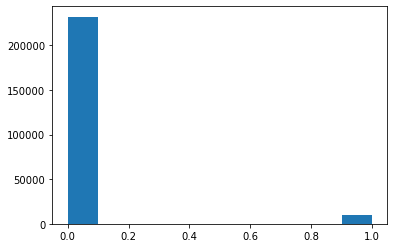

In [198]:
plt.hist(data2015['Dissolved'])
plt.show()

In [199]:
data2015.Dissolved.sum()

10126

In [200]:
#Creating Org size variable based on increments of 100,000
data2015['org_size'] = data2015['CYTotalExpensesAmt']/100000

data2015 = data2015.drop(['name_mission'], axis =1)

#Median Income
data2015['Median Household Income'].fillna(0, inplace = True) 
data2015['Median Household Income'] = data2015['Median Household Income'].astype('float')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 242298 entries, 0 to 242297
Data columns (total 80 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   TaxYr                                          242298 non-null  int64         
 1   TaxPeriodBeginDt                               242298 non-null  object        
 2   TaxPeriodEndDt                                 242298 non-null  object        
 3   ReturnTs                                       242298 non-null  datetime64[ns]
 4   EIN                                            242298 non-null  int64         
 5   BusinessName                                   242298 non-null  object        
 6   AddressLine1Txt                                242099 non-null  object        
 7   City                                           242100 non-null  object        
 8   ZIPCd                                       

In [201]:

df2016 = df2016[['EIN', 'Ratio_ProgramExp_Rev', 'TotalFunctionExpenses_ProgramServicesAmt', 'Ratio_ProgramExp_Totalexp']]
df2017 = df2017[['EIN', 'Ratio_ProgramExp_Rev', 'TotalFunctionExpenses_ProgramServicesAmt', 'Ratio_ProgramExp_Totalexp']]
df2018 = df2018[['EIN', 'Ratio_ProgramExp_Rev', 'TotalFunctionExpenses_ProgramServicesAmt', 'Ratio_ProgramExp_Totalexp']]

df2016 = df2016.rename(columns={'Ratio_ProgramExp_Rev': 'Ratio_ProgramExp_Rev2016', 'TotalFunctionExpenses_ProgramServicesAmt': 'TotalFunctionExpenses_ProgramServicesAmt2016', 'Ratio_ProgramExp_Totalexp': 'Ratio_ProgramExp_Totalexp2016'})
df2017 = df2017.rename(columns={'Ratio_ProgramExp_Rev': 'Ratio_ProgramExp_Rev2017','TotalFunctionExpenses_ProgramServicesAmt': 'TotalFunctionExpenses_ProgramServicesAmt2017', 'Ratio_ProgramExp_Totalexp':'Ratio_ProgramExp_Totalexp2017'})
df2018 = df2018.rename(columns={'Ratio_ProgramExp_Rev': 'Ratio_ProgramExp_Rev2018', 'TotalFunctionExpenses_ProgramServicesAmt': 'TotalFunctionExpenses_ProgramServicesAmt2018', 'Ratio_ProgramExp_Totalexp': 'Ratio_ProgramExp_Totalexp2018'})

data2015 = data2015.merge(df2016, on='EIN', how = 'left')
data2015 = data2015.merge(df2017, on='EIN', how = 'left')
data2015 = data2015.merge(df2018, on='EIN', how = 'left')

data2015 = data2015.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
print(len(data2015))

#Dropping nonprofits that don't appear in 2017 or2018 is not very many. 
#data2015.dropna(subset = ["Ratio_ProgramExp_Rev2016"], inplace=True)
#data2015.dropna(subset = ["Ratio_ProgramExp_Rev2017"], inplace=True)
#data2015.dropna(subset = ["Ratio_ProgramExp_Rev2018"], inplace=True)
data2015["Ratio_ProgramExp_Rev"].fillna(0, inplace = True) 
data2015["Ratio_Equity_Revenue"].fillna(0, inplace = True) 
data2015["Ratio_AdminExp_Exp"].fillna(0, inplace = True) 
data2015["Operating_Margin"].fillna(0, inplace = True) 
data2015["Revenue_Concentration"].fillna(0, inplace = True) 

#Vulnerable useing ratio of program expenses to total revenue
data2015['vulnerable2016'] = np.where(data2015['Ratio_ProgramExp_Rev'] > data2015['Ratio_ProgramExp_Rev2016'], 1, 0)
data2015['vulnerable2017'] = np.where(data2015['Ratio_ProgramExp_Rev2016'] > data2015['Ratio_ProgramExp_Rev2017'], 1, 0)
data2015['vulnerable2018'] = np.where(data2015['Ratio_ProgramExp_Rev2017'] > data2015['Ratio_ProgramExp_Rev2018'], 1, 0)
data2015['vulnerable'] = np.where((data2015['vulnerable2016'] == 1) & (data2015['vulnerable2017'] == 1) & (data2015['vulnerable2018'] == 1), 1, 0)

#Vulerable using decline in program expenses 
data2015['vulnerable2016_ps_decline'] = np.where(data2015['TotalFunctionExpenses_ProgramServicesAmt'] > data2015['TotalFunctionExpenses_ProgramServicesAmt2016'], 1, 0)
data2015['vulnerable2017_ps_decline'] = np.where(data2015['TotalFunctionExpenses_ProgramServicesAmt2016'] > data2015['TotalFunctionExpenses_ProgramServicesAmt2017'], 1, 0)
data2015['vulnerable2018_ps_decline'] = np.where(data2015['TotalFunctionExpenses_ProgramServicesAmt2017'] > data2015['TotalFunctionExpenses_ProgramServicesAmt2018'], 1, 0)
data2015['vulnerable_ps_decline'] = np.where((data2015['vulnerable2016_ps_decline'] == 1) & (data2015['vulnerable2017_ps_decline'] == 1) & (data2015['vulnerable2018_ps_decline'] == 1), 1, 0)

#Vulerable using decline in program expenses to total expenses
data2015['vulnerable2016_ps_total_decline'] = np.where(data2015['Ratio_ProgramExp_Totalexp'] > data2015['Ratio_ProgramExp_Totalexp2016'], 1, 0)
data2015['vulnerable2017_ps_total_decline'] = np.where(data2015['Ratio_ProgramExp_Totalexp2016'] > data2015['Ratio_ProgramExp_Totalexp2017'], 1, 0)
data2015['vulnerable2018_ps_total_decline'] = np.where(data2015['Ratio_ProgramExp_Totalexp2017'] > data2015['Ratio_ProgramExp_Totalexp2018'], 1, 0)
data2015['vulnerable_ps_total_decline'] = np.where((data2015['vulnerable2016_ps_total_decline'] == 1) & (data2015['vulnerable2017_ps_total_decline'] == 1) & (data2015['vulnerable2018_ps_total_decline'] == 1), 1, 0)



260374


In [203]:
data2015['Population'] = data2015['Population']/100000

In [205]:
data2015['Median Household Income'] = data2015['Median Household Income']/10000

In [206]:
data2015.to_csv('data/processed/data2015.csv')

# Function to convert log odds to percentages 

In [25]:
#Converting logits to percentages
def convertlogit(logit):
    odds = np.exp(logit)
    prob = odds / (1+ odds)
    print(prob)
    return
    

In [202]:
NTEE_Code = pd.get_dummies(data2015.recommended, prefix='NTEE_Code')
df2015_all_categories= pd.concat([data2015.reset_index(drop=True), NTEE_Code], axis=1, ignore_index=False)

Before removing outliers 
 count    1.576080e+05
mean     9.147660e+06
std      1.653444e+08
min     -2.209473e+06
25%      1.929198e+05
50%      4.724060e+05
75%      1.700779e+06
max      4.825271e+10
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    1.402700e+05
mean     9.686189e+05
std      1.381817e+06
min      3.857000e+03
25%      1.791658e+05
50%      3.974740e+05
75%      1.083456e+06
max      7.461774e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.212348
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.002     
Dependent Variable:    y                 AIC:               41732.4856
Date:                  2020-11-12 12:31  BIC:               41884.4000
No. Observations:      98189             Log-Likelihood:    -20850.   
Df Model:              15                LL-Null:           -20886.   
Df Residu

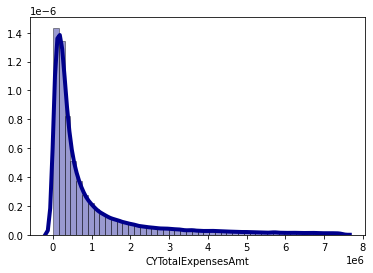

In [165]:
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

print("Before removing outliers","\n", df2015_all_categories['CYTotalExpensesAmt'].describe(), "\n")
df2015_full = df2015_all_categories[df2015_all_categories['CYTotalExpensesAmt'].between(df2015_all_categories['CYTotalExpensesAmt'].quantile(.01), df2015_all_categories['CYTotalExpensesAmt'].quantile(.9))] # without outliers
print("After removing outliers","\n", df2015_full['CYTotalExpensesAmt'].describe(),"\n")
    
sns.distplot(df2015_full['CYTotalExpensesAmt'], hist=True, kde=True, 
         color = 'darkblue', 
         hist_kws={'edgecolor':'black'},
         kde_kws={'linewidth': 4})

logistic = df2015_full[['FormationYr',
               'CYTotalExpensesAmt',
               'Ratio_Equity_Revenue',
               'Ratio_AdminExp_Exp',
               'Operating_Margin',
               'Revenue_Concentration',
               'vulnerable',
               'NTEE_Code_I',
               'NTEE_Code_II',
               'NTEE_Code_III',
               'NTEE_Code_IV',
               'NTEE_Code_IX',
               'NTEE_Code_V',
               'NTEE_Code_VI',
               'NTEE_Code_VII',
               'NTEE_Code_VIII'
                 ]]

#'Dependence_Grants',
#'Dependence_Campaigns',
#'Dependence_Memberships',
#'Dependence_Fundraising', 
#'Dependence_ProgramServ',
#'Dependence_Invest'

#Apparently no trust in this dataset. 
logistic = logistic.replace([np.inf, -np.inf], np.nan)
logistic = logistic.fillna(0)



logistic['vulnerable'] = logistic['vulnerable'].astype(float)



X = logistic.loc[:, logistic.columns != 'vulnerable']
X_colnames = X.columns

#normalizeing
#X = preprocessing.normalize(X)
X = pd.DataFrame(X, columns = X_colnames)
y = logistic.loc[:, logistic.columns == 'vulnerable']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


y_train=y_train.values.reshape(-1,1)

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(max_iter=500)
print(result.summary2())

In [204]:

df2015_full = df2015_all_categories[df2015_all_categories['CYTotalExpensesAmt'].between(df2015_all_categories['CYTotalExpensesAmt'].quantile(.01), df2015_all_categories['CYTotalExpensesAmt'].quantile(.9))] # without outliers

logistic = df2015_full[['FormationYr',
               'CYTotalExpensesAmt',
               'Ratio_Equity_Revenue',
               'Ratio_AdminExp_Exp',
               'Operating_Margin',
               'Revenue_Concentration',
               #'Ratio_ProgramExp_Rev',
               'vulnerable_ps_decline',
               'NTEE_Code_I',
               'NTEE_Code_II',
               'NTEE_Code_III',
               'NTEE_Code_IV',
               'NTEE_Code_IX',
               'NTEE_Code_V',
               'NTEE_Code_VI',
               'NTEE_Code_VII',
               'NTEE_Code_VIII'
                 ]]

#'Dependence_Grants',
#'Dependence_Campaigns',
#'Dependence_Memberships',
#'Dependence_Fundraising', 
#'Dependence_ProgramServ',
#'Dependence_Invest'

#Apparently no trust in this dataset. 
logistic = logistic.replace([np.inf, -np.inf], np.nan)
logistic = logistic.fillna(0)



logistic['vulnerable_ps_decline'] = logistic['vulnerable_ps_decline'].astype(float)



X = logistic.loc[:, logistic.columns != 'vulnerable_ps_decline']
X_colnames = X.columns

#normalizeing
#X = preprocessing.normalize(X)
X = pd.DataFrame(X, columns = X_colnames)
y = logistic.loc[:, logistic.columns == 'vulnerable_ps_decline']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


y_train=y_train.values.reshape(-1,1)

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(max_iter=500)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.210391
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.002     
Dependent Variable:    y                 AIC:               41348.0968
Date:                  2020-11-12 13:27  BIC:               41500.0112
No. Observations:      98189             Log-Likelihood:    -20658.   
Df Model:              15                LL-Null:           -20692.   
Df Residuals:          98173             LLR p-value:       1.2194e-08
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
FormationYr           -0.0013   0.0000 -47.2018 0.0000 -0.0014 -0.0013
CYT